In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as sm
sns.set()

###  Create a simulated dataset where there is collinearity between two predictors
n = 100, ß₀ = 2, ß₁ = 2, ß₂ = 0.3

In [2]:
np.random.seed(1)
x1 = np.random.uniform(size=100)
x2 = 0.5 * x1 + np.random.randn(100) / 10
y = 2 + 2 * x1 + 0.3 * x2 + np.random.randn(100)
df = pd.DataFrame({'x1' : x1, 'x2' : x2, 'y' : y})
df.head()

,x1,x2,y
0,0.417022,0.240074,2.949735
1,0.720324,0.157942,3.261717
2,0.000114,-0.030563,3.322517
3,0.302333,0.233964,2.387546
4,0.146756,0.096387,3.002498


There is a strong correlation of 0.84 between x1 and x2 :

In [3]:
df.corr()

,x1,x2,y
x1,1.000000,0.839060,0.473077
x2,0.839060,1.000000,0.501172
y,0.473077,0.501172,1.000000


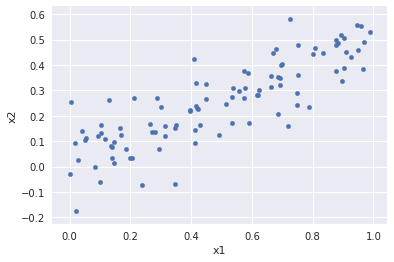

In [4]:
df.plot.scatter('x1', 'x2');

### Predict y using x1 and x2

In [5]:
fit = sm.ols('y ~ x1 + x2', df).fit()
fit.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,2.189284,0.198655,11.020556,8.532403e-19,1.795010,2.583559
x1,0.704629,0.636765,1.106575,2.712146e-01,-0.559175,1.968432
x2,2.502405,1.140433,2.194259,3.060418e-02,0.238962,4.765848


The estimated coefficients of x1 and x2 are quite different from the true coefficients.
For the coefficient of x1 we cannot reject the null hypothesis because the p-value is 0.27.

### Predict y using x1

In [6]:
fit_x1 = sm.ols('y ~ x1', df).fit()
fit_x1.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,2.248581,0.200602,11.209167,2.942644e-19,1.850493,2.646669
x1,1.876987,0.353104,5.315681,6.683125e-07,1.176264,2.577709


When we predict y using only x1, the estimated coefficient of x1 (1.88) is much closer to the true coefficient (2).
We can now also reject the null hypothesis for the coefficient of x1 because the p-value is very low.

### Predict y using x2

In [7]:
fit_x2 = sm.ols('y ~ x2', df).fit()
fit_x2.summary2().tables[1]

,Coef.,Std.Err.,t,P>|t|,[0.025,0.975]
Intercept,2.265526,0.186537,12.145167,2.952030e-21,1.895349,2.635703
x2,3.561276,0.621151,5.733353,1.090964e-07,2.328623,4.793930


Also when we predict y using only x2, the p-value of the coefficient of x2 is very low so we can reject the null hypothesis. The estimated coefficient of x2 (3.56) is still quite different from the true coefficient (0.3).